# Epidemiological Outbreak of COVID-19 in the US

In this project, we will look at the outbreak of COVID-19 in USA in greater detail. The data is downloaded from the John Hopkins University Center for Systems Science and Engineering (JHU CSSE) and is updated daily. The website is also supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

It does not provide data for number of recovered cases because of difficulties in getting reliable data out of different counties and states.

Files we are interested in - covid_19_confirmed_US and covid_19_deaths_US

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as po
import plotly.figure_factory as ff

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
po.init_notebook_mode(connected = True)

## Reading the data

In [2]:
CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
confirmed_US = pd.read_csv(CONFIRMED_URL)
print(confirmed_US.shape)
confirmed_US.head(20)

(3261, 138)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151,151,151,151,152,152,152,154,154,154,154,154,154,165,165,165,166,166,167,170
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,16,16,19,19,19,19,19,21,21,21,21,21,22,22,22,22,22,22,22
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256,2299,2329,2427,2542,2589,2646,2710,2805,2866,2913,3030,3100,3189,3260,3324,3397
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68,68,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45,48,53,53,58,61,67,68,74,84,91,93,104,103,110,110,120,127,136,143,149,155,159,168,189,192
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,3,4,4,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109,112,117,123,132,143,147,147,161,168,171,174,174,175,181,187,188,189,196,205,208,216,222,224,227,231,243,244,254,254,260,2

In [3]:
DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
deaths_US = pd.read_csv(DEATHS_URL)
print(deaths_US.shape)
deaths_US.tail(20)

(3261, 139)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
3241,84090045,US,USA,840,90045.0,Unassigned,South Carolina,US,0.000000,0.000000,"Unassigned, South Carolina, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3242,84090046,US,USA,840,90046.0,Unassigned,South Dakota,US,0.000000,0.000000,"Unassigned, South Dakota, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,5,0,0,0,0,0,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3243,84090047,US,USA,840,90047.0,Unassigned,Tennessee,US,0.000000,0.000000,"Unassigned, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,4,4,11,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0
3244,84090048,US,USA,840,90048.0,Unassigned,Texas,US,0.000000,0.000000,"Unassigned, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3245,84090049,US,USA,840,90049.0,Unassigned,Utah,US,0.000000,0.000000,"Unassigned, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,5,5,0,5,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3246,84090050,US,USA,840,90050.0,Unassigned,Vermont,US,0.000000,0.000000,"Unassigned, Vermont, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,2,3,4,5,7,7,7,8,11,12,12,15,17,18,18,18,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3247,84090051,US,USA,840,90051.0,Unassigned,Virginia,US,0.000000,0.000000,"Unassigned, Virginia, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,12,19,26,31,36,36,50,50,42,78,83,91,62,70,75,101,77,67,94,113,116,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3248,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.000000,0.000000,"Unassigned, Washington, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3249,84090054,US,USA,

## Exploratory Data Analysis

Before we check for null values, lets look at some of the columns in the dataframe and what it means.

**UID** - Unique Identifier for each row. It is a combination of code3 and FIPS
<br>
**iso2** & **iso3** - country name
<br>
**code3** - specific code number for each country. In this case, its 840 for all contiguous US states.
<br>
**FIPS** - Federal information Processing Standard State Codes. Starts with 00001 for Alabama to 00056 for Wyoming. 
<br>
**Admin2** - county information for each state. 
<br>
Besides the county names, there are 2 values of the column that do not give county information - Unassigned & Out of {state}. After much digging into the github data, I still cannot figure out what Unassigned stands for. Possibly people who do not belong to any counties? Out of {state} probably includes people who are being treated in that particular state but are not from the said state. 

In [4]:
confirmed_US['Province_State'].unique()

array(['American Samoa', 'Guam', 'Northern Mariana Islands', 'Puerto Rico',
       'Virgin Islands', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Diamond Princess',
       'Grand Princess'], dtype=object)

Checking for any null values in the two dataframes.

In [5]:
print(confirmed_US.isnull().sum()[confirmed_US.isnull().sum() != 0])
confirmed_US[confirmed_US['FIPS'].isnull()]
confirmed_US[confirmed_US['Admin2'].isnull()]
display(confirmed_US[confirmed_US['Lat'].isnull()])
display(confirmed_US[confirmed_US['UID'].isnull()])

FIPS      10
Admin2     7
dtype: int64


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20


In [6]:
print(deaths_US.isnull().sum()[deaths_US.isnull().sum() != 0])
deaths_US[deaths_US['FIPS'].isnull()]
#deaths_US[deaths_US['Admin2'].isnull()]
display(deaths_US[deaths_US['UID'].isnull()])

FIPS      10
Admin2     7
dtype: int64


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20


FIPS column is missing two values and Admin2 is missing 7 values in both the dataframes. Admin2 missing values indicate no county based information for places like Virgin Islands and Peurto Rico. I will replace the NaN with empty values.<br>
The UID, Lat and Long_ values are all missing from the same row (Province_State = Utah & Admin2 = 'Southwest'). The row will be deleted since all the count values are zero for that row and there is another 'Southwest Utah' admin2 row in the dataframe.

In [7]:
#Remove the Southwest, Utah row
confirmed_US.dropna(axis=0, subset = ['UID'], inplace=True)
deaths_US.dropna(axis=0, subset = ['UID'], inplace=True)

#Replace NaN values
confirmed_US = confirmed_US.fillna(value='')
deaths_US = deaths_US.fillna(value = '')

In [8]:
#check to see if the values have been replaced
print(deaths_US.isna().sum().sum())
print(confirmed_US.isna().sum().sum())

0
0


### Total confirmed and deaths in the US

Lets get the total counts as of yesterday, the data is stored in the last column of each dataframe as well as county and state information and store it in a new dataframe

In [9]:
cols = ['UID', 'FIPS', 'Admin2', 'Province_State', 'Country_Region']
cols.append(confirmed_US.columns[-1])
total_covid_df = confirmed_US[cols]
total_covid_df['Death Count'] = deaths_US.iloc[:,-1]
total_covid_df.rename(columns={cols[-1]:'Confirmed Count', 'Admin2': 'County'}, inplace=True)
total_covid_df

,UID,FIPS,County,Province_State,Country_Region,Confirmed Count,Death Count
0,16,60,,American Samoa,US,0,0
1,316,66,,Guam,US,170,5
2,580,69,,Northern Mariana Islands,US,22,2
3,630,72,,Puerto Rico,US,3397,129
4,850,78,,Virgin Islands,US,69,6
...,...,...,...,...,...,...,...
3256,84070016,,Central Utah,Utah,US,33,0
3257,84070017,,Southeast Utah,Utah,US,23,0
3258,84070018,,Southwest Utah,Utah,US,335,4
3259,84070019,,TriCounty,Utah,US,20,0


We'll plot a treemap graph from the above data grouped by state

In [10]:
grouped_states_total = total_covid_df[['Confirmed Count', 'Death Count', 'Province_State']].groupby(by='Province_State').sum().reset_index()
grouped_states_total['Country'] = 'US'  #adding for path0
grouped_states_total

,Province_State,Confirmed Count,Death Count,Country
0,Alabama,16032,584,US
1,Alaska,411,29,US
2,American Samoa,0,0,US
3,Arizona,17318,832,US
4,Arkansas,6277,120,US
5,California,101050,3896,US
6,Colorado,24754,1392,US
7,Connecticut,41288,3802,US
8,Delaware,9096,344,US
9,Diamond Princess,49,0,US


In [11]:
fig = go.Figure()
fig = px.treemap(grouped_states_total, path=['Country','Province_State'], 
                 values='Confirmed Count', color='Confirmed Count', color_continuous_scale='Plasma')
fig.update_layout(template='plotly_dark', title='Confirmed cases by state')
fig.show()

In [12]:
fig = go.Figure()
fig = px.treemap(grouped_states_total, path=['Country','Province_State'], 
                 values='Death Count', color='Death Count', color_continuous_scale='Plasma')
fig.update_layout(template='plotly_dark', title='Total deaths by state')
fig.show()

We want to add another column to the grouped_states_total df. The column will represent the 2-letter State Code for each State. This will be useful for plotting choropleth maps in plotly.

In [13]:
#Copy the state column and change it to 2 letter state code 
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
grouped_states_total['State Code'] = grouped_states_total['Province_State']
grouped_states_total['State Code'].replace(us_state_abbrev, inplace=True)
grouped_states_total

,Province_State,Confirmed Count,Death Count,Country,State Code
0,Alabama,16032,584,US,AL
1,Alaska,411,29,US,AK
2,American Samoa,0,0,US,AS
3,Arizona,17318,832,US,AZ
4,Arkansas,6277,120,US,AR
5,California,101050,3896,US,CA
6,Colorado,24754,1392,US,CO
7,Connecticut,41288,3802,US,CT
8,Delaware,9096,344,US,DE
9,Diamond Princess,49,0,US,Diamond Princess


In [14]:
#Lets save this dataframe to a .csv file
grouped_states_total.to_csv('COVID_USA_States.csv', index=False)

Lets do a scatter plot of confirmed cases on USA map using go.Scattergeo. The locations will be defined by the 2-letter state code (or lat/long info if I had that in the DF) and locationmode set to 'USA-states'. I added a 'text' column that will be used to show the name of the state and the total confirmed and death counts on hover. The 'br' in the column values will be parsed by the 'text' property of scattergeo as printing on the next line. 

In [15]:
grouped_states_total['Text'] = grouped_states_total['Province_State'] \
                              +'<br>'+grouped_states_total['Confirmed Count'].astype(str)+' cases' \
                              +'<br>'+grouped_states_total['Death Count'].astype(str)+' deaths'

fig = go.Figure()
fig.add_trace(go.Scattergeo(locations = grouped_states_total['State Code'], 
                            locationmode = 'USA-states',
                            marker = dict(
                                          size = grouped_states_total['Confirmed Count']/100,
                                          sizemode = 'area',
                                          color = 'rgb(145, 145, 145)',
                                          line_color = 'rgb(0, 0, 0)',
                                          line_width = 1
                                          ),
                            text = grouped_states_total['Text'],
                           )
             )
fig.update_layout(geo = {'scope': 'usa',
                         'landcolor': "#fddcaf",
                         'subunitcolor': "#fdb27a",
                         'resolution': 110},
                  title = 'Tracking The Spread Of The Coronavirus In The US'
                 )
fig.show()

### US confirmed cases evolution with time

In [16]:
confirmed_US_loc = confirmed_US[['Province_State', 'Lat', 'Long_']]
confirmed_US_loc = confirmed_US_loc.groupby('Province_State').median().reset_index()
confirmed_US_loc

,Province_State,Lat,Long_
0,Alabama,32.850441,-86.651584
1,Alaska,59.561500,-146.569266
2,American Samoa,-14.271000,-170.132000
3,Arizona,33.214988,-110.847909
4,Arkansas,34.945915,-92.423206
5,California,37.982717,-120.801126
6,Colorado,38.871899,-105.433811
7,Connecticut,41.474231,-72.433998
8,Delaware,38.661438,-75.390313
9,Diamond Princess,0.000000,0.000000


In [17]:
del_cols = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key']
confirmed_US_cases = confirmed_US.drop(columns=del_cols)
confirmed_US_cases = confirmed_US_cases.groupby('Province_State').sum().reset_index()
confirmed_US_cases = confirmed_US_cases.merge(confirmed_US_loc)
confirmed_US_cases = confirmed_US_cases.melt(id_vars=['Province_State', 'Lat', 'Long_'], value_name='Count', var_name='Date')
confirmed_US_cases

,Province_State,Lat,Long_,Date,Count
0,Alabama,32.850441,-86.651584,1/22/20,0
1,Alaska,59.561500,-146.569266,1/22/20,0
2,American Samoa,-14.271000,-170.132000,1/22/20,0
3,Arizona,33.214988,-110.847909,1/22/20,0
4,Arkansas,34.945915,-92.423206,1/22/20,0
...,...,...,...,...,...
7361,Virginia,37.373732,-78.158270,5/27/20,40249
7362,Washington,47.125212,-120.738013,5/27/20,20406
7363,West Virginia,38.843154,-80.665911,5/27/20,1899
7364,Wisconsin,44.397070,-89.560937,5/27/20,16462


In [18]:
fig = go.Figure()
fig = px.choropleth(data_frame=grouped_states_total, locations='State Code', locationmode='USA-states', 
                    scope='usa', color='Confirmed Count', color_continuous_scale = 'magenta',
                   hover_name = 'Province_State')
fig.show()

In [19]:
fig = go.Figure()
fig = px.choropleth(data_frame=grouped_states_total, locations='State Code', locationmode='USA-states', 
                    scope='usa', color='Death Count', color_continuous_scale = 'Ylorrd',
                   hover_name = 'Province_State')
fig.show()

In [20]:
state_covid_df = total_covid_df[total_covid_df['Province_State'] == 'Kentucky'].reset_index()
state_covid_df

,index,UID,FIPS,County,Province_State,Country_Region,Confirmed Count,Death Count
0,998,84021001,21001,Adair,Kentucky,US,96,19
1,999,84021003,21003,Allen,Kentucky,US,56,3
2,1000,84021005,21005,Anderson,Kentucky,US,15,1
3,1001,84021007,21007,Ballard,Kentucky,US,10,0
4,1002,84021009,21009,Barren,Kentucky,US,44,1
5,1003,84021011,21011,Bath,Kentucky,US,8,1
6,1004,84021013,21013,Bell,Kentucky,US,1,0
7,1005,84021015,21015,Boone,Kentucky,US,403,13
8,1006,84021017,21017,Bourbon,Kentucky,US,10,1
9,1007,84021019,21019,Boyd,Kentucky,US,39,3


In [21]:
fig = go.Figure()
colorscale = ["#fff7ec","#fdd49e","#fc8d59","#d7301f","#7f0000"]

fig = ff.create_choropleth(fips=state_covid_df['FIPS'].to_list(), values=state_covid_df['Confirmed Count'].to_list(), 
                           scope=['KY'], binning_endpoints=[1, 10, 50, 1000],
                           colorscale=colorscale, show_hover=True,
                           plot_bgcolor='rgb(229,229,229)',
                           paper_bgcolor='rgb(229,229,229)',
                           county_outline={'color': 'rgb(0,0,0)', 'width': 0.5},
                           state_outline={'color': 'rgb(255,255,255)', 'width': 1},
                           exponent_format=True)
#fig.update_layout(template='seaborn')
fig.show()

/Users/neha/anaconda3/lib/python3.6/site-packages/plotly/figure_factory/_county_choropleth.py:845: UserWarning:

Unrecognized FIPS Values

Whoops! It looks like you are trying to pass at least one FIPS value that is not in our shapefile of FIPS and data for the counties. Your choropleth will still show up but these counties cannot be shown.
Unrecognized FIPS are: [80021, 90021]



In [22]:
usa_shape = gpd.read_file('tl_2017_us_state/tl_2017_us_state.shp')

In [23]:
usa_shape.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


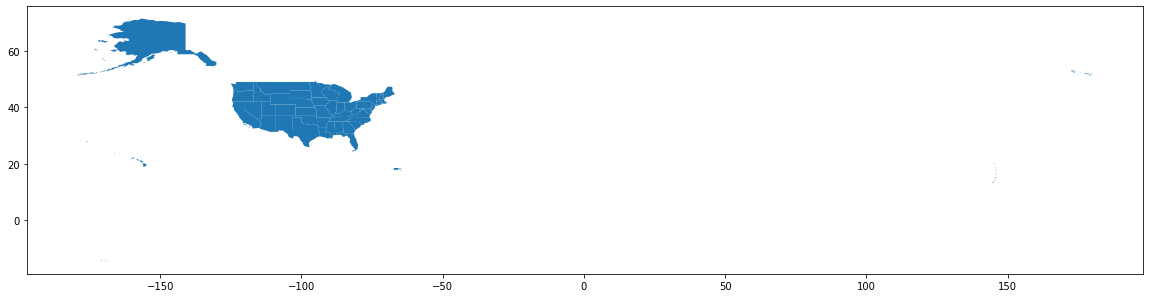

In [24]:
usa_shape.plot(figsize = (20,10))

In [25]:
ky_shape = usa_shape[(usa_shape['STUSPS'] == 'KY') | (usa_shape['STUSPS'] == 'IN') | (usa_shape['STUSPS'] == 'TN')]
ky_shape

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
29,3,6,47,01325873,47,TN,Tennessee,00,G4000,A,106798015774,2354836197,+35.8585557,-086.3493580,"POLYGON ((-82.22206 36.15696, -82.22214 36.156..."
33,3,6,21,01779786,21,KY,Kentucky,00,G4000,A,102266092821,2388731561,+37.5336844,-085.2929801,"MULTIPOLYGON (((-89.57120 36.55214, -89.57114 ..."
48,2,3,18,00448508,18,IN,Indiana,00,G4000,A,92787765193,1539541677,+39.9030256,-086.2839503,"POLYGON ((-87.52659 40.47688, -87.52658 40.478..."


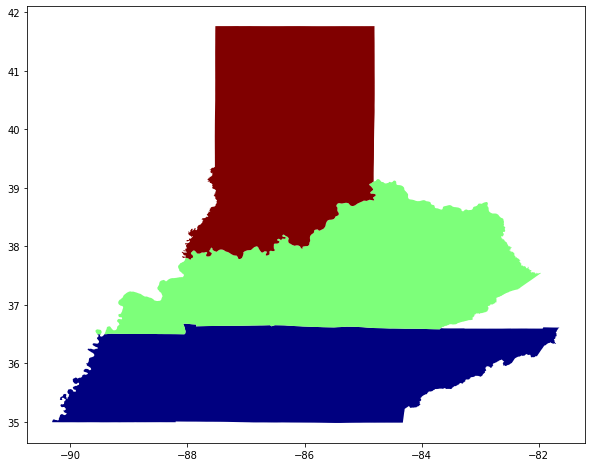

In [26]:
ky_shape.plot(cmap = 'jet', figsize = (10,10))

In [27]:
usa_county = gpd.read_file('cb_2018_us_county_20m/cb_2018_us_county_20m.shp')
usa_county.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850..."
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737 35.20210, -80.29542 35.502..."
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68699 41.13596, -81.68495 41.277..."
3,42,113,01213687,0500000US42113,42113,Sullivan,06,1165338428,6617028,"POLYGON ((-76.81373 41.59003, -76.22014 41.541..."
4,48,459,01384015,0500000US48459,48459,Upshur,06,1509910100,24878888,"POLYGON ((-95.15274 32.66095, -95.15211 32.902..."


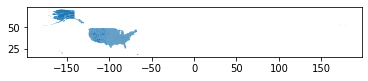

In [28]:
usa_county.plot()

In [29]:
#drop Alaska and Hawaii to get a closer view of mainland USA map
usa_county.drop(index = usa_county[usa_county['STATEFP'] == '02'].index, inplace = True) 
usa_county.drop(index = usa_county[usa_county['STATEFP'] == '15'].index, inplace = True)

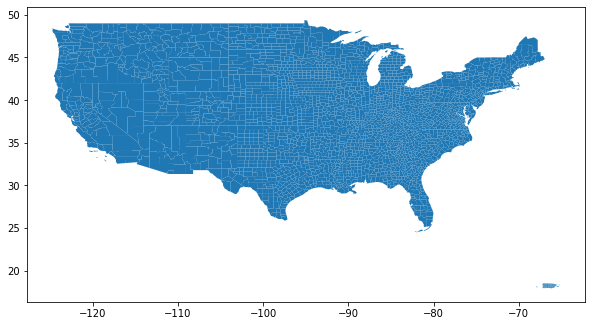

In [30]:
usa_county.plot(figsize = (10,10))

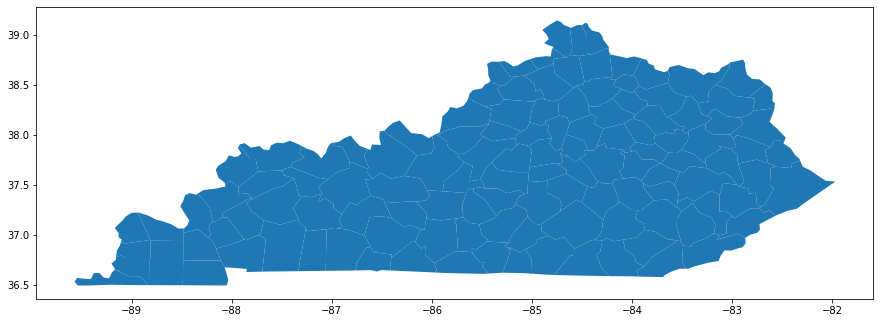

In [31]:
usa_county[usa_county['STATEFP'] == '21'].plot(figsize = (15,8))

In [32]:
ky_county_df = usa_county[usa_county['STATEFP'] == '21']
ky_county_df.rename(columns = {'NAME': 'County'}, inplace=True)
ky_county_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,LSAD,ALAND,AWATER,geometry
61,21,215,00516954,0500000US21215,21215,Spencer,06,483607178,12792868,"POLYGON ((-85.51688 38.01127, -85.43613 38.104..."
117,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.93035 38.49228, -83.85928 38.456..."
196,21,067,00516880,0500000US21067,21067,Fayette,06,734615998,4922115,"POLYGON ((-84.62508 38.11640, -84.60953 38.133..."
197,21,049,00516871,0500000US21049,21049,Clark,06,653935807,6915925,"POLYGON ((-84.34875 37.89843, -84.28646 38.067..."
209,21,087,00516890,0500000US21087,21087,Green,06,740863524,7102449,"POLYGON ((-85.69732 37.30184, -85.65733 37.422..."


In [33]:
#drop Out of KY and Unassigned rows
state_covid_df.drop(index = [120,121], inplace=True)
state_covid_df.shape

(120, 8)

In [34]:
state_covid_df.head()

,index,UID,FIPS,County,Province_State,Country_Region,Confirmed Count,Death Count
0,998,84021001,21001,Adair,Kentucky,US,96,19
1,999,84021003,21003,Allen,Kentucky,US,56,3
2,1000,84021005,21005,Anderson,Kentucky,US,15,1
3,1001,84021007,21007,Ballard,Kentucky,US,10,0
4,1002,84021009,21009,Barren,Kentucky,US,44,1


In [35]:
ky_covid_county_map_df = pd.merge(ky_county_df, state_covid_df, on='County')
ky_covid_county_map_df.drop(columns = ['COUNTYNS', 'AFFGEOID', 'GEOID', 'LSAD', 'ALAND', 'AWATER', 'index', 'UID'], inplace=True)
ky_covid_county_map_df.head()

,STATEFP,COUNTYFP,County,geometry,FIPS,Province_State,Country_Region,Confirmed Count,Death Count
0,21,215,Spencer,"POLYGON ((-85.51688 38.01127, -85.43613 38.104...",21215,Kentucky,US,17,0
1,21,069,Fleming,"POLYGON ((-83.93035 38.49228, -83.85928 38.456...",21069,Kentucky,US,3,0
2,21,067,Fayette,"POLYGON ((-84.62508 38.11640, -84.60953 38.133...",21067,Kentucky,US,650,13
3,21,049,Clark,"POLYGON ((-84.34875 37.89843, -84.28646 38.067...",21049,Kentucky,US,38,0
4,21,087,Green,"POLYGON ((-85.69732 37.30184, -85.65733 37.422...",21087,Kentucky,US,1,0


(-89.951640199999972,
 -81.588137799999984,
 36.365462800000003,
 39.279829199999995)

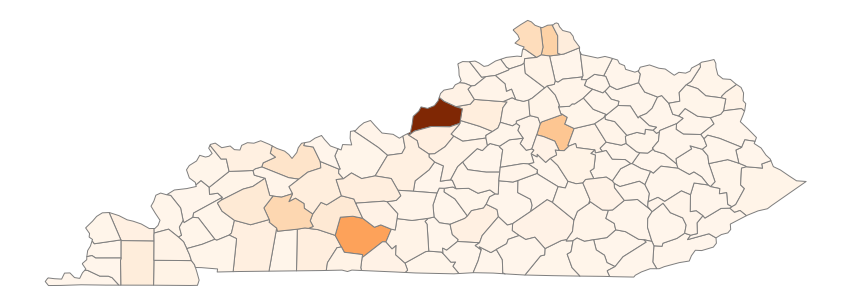

In [36]:
fig, ax = plt.subplots(1, figsize = (15,8))
ky_covid_county_map_df.plot(column = 'Confirmed Count', cmap ='Oranges', linewidth = 1, edgecolor='0.5', ax=ax)
ax.axis('off')

In [37]:
usa_county.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850..."
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737 35.20210, -80.29542 35.502..."
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68699 41.13596, -81.68495 41.277..."
3,42,113,01213687,0500000US42113,42113,Sullivan,06,1165338428,6617028,"POLYGON ((-76.81373 41.59003, -76.22014 41.541..."
4,48,459,01384015,0500000US48459,48459,Upshur,06,1509910100,24878888,"POLYGON ((-95.15274 32.66095, -95.15211 32.902..."


In [38]:
total_covid_df['FIPS'].head()

0    60
1    66
2    69
3    72
4    78
Name: FIPS, dtype: object

In [39]:
#merge STATEFP and COUNTYFP values in usa_county_df

usa_county['FIPS'] = usa_county['STATEFP'] + usa_county['COUNTYFP']
usa_county.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,FIPS
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850...",37017
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737 35.20210, -80.29542 35.502...",37167
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68699 41.13596, -81.68495 41.277...",39153
3,42,113,01213687,0500000US42113,42113,Sullivan,06,1165338428,6617028,"POLYGON ((-76.81373 41.59003, -76.22014 41.541...",42113
4,48,459,01384015,0500000US48459,48459,Upshur,06,1509910100,24878888,"POLYGON ((-95.15274 32.66095, -95.15211 32.902...",48459


In [40]:
usa_county['FIPS'] = usa_county['FIPS'].astype('int')
usa_county.sort_values(by='FIPS')

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,FIPS
492,01,001,00161526,0500000US01001,01001,Autauga,06,1539602123,25706961,"POLYGON ((-86.91759 32.66417, -86.71339 32.661...",1001
2009,01,003,00161527,0500000US01003,01003,Baldwin,06,4117546676,1133055836,"POLYGON ((-88.02632 30.75336, -87.94455 30.827...",1003
2428,01,005,00161528,0500000US01005,01005,Barbour,06,2292144655,50538698,"POLYGON ((-85.73573 31.62449, -85.66565 31.786...",1005
620,01,007,00161529,0500000US01007,01007,Bibb,06,1612167481,9602089,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",1007
1155,01,009,00161530,0500000US01009,01009,Blount,06,1670103911,15015423,"POLYGON ((-86.96336 33.85822, -86.92439 33.909...",1009
...,...,...,...,...,...,...,...,...,...,...,...
95,72,145,01804553,0500000US72145,72145,Vega Baja,13,118777649,57795019,"POLYGON ((-66.44899 18.38721, -66.43895 18.481...",72145
792,72,147,01804554,0500000US72147,72147,Vieques,13,131541395,552192819,"POLYGON ((-65.57686 18.10322, -65.50592 18.152...",72147
473,72,149,01804555,0500000US72149,72149,Villalba,13,92298569,3622639,"POLYGON ((-66.52190 18.15195, -66.47055 18.177...",72149
263,72,151,01804556,0500000US72151,72151,Yabucoa,13,143005179,72592521,"POLYGON ((-66.01024 18.07556, -65.93317 18.093...",72151


In [41]:
usa_county[usa_county['FIPS'] == 1001]

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,FIPS
492,01,001,00161526,0500000US01001,01001,Autauga,06,1539602123,25706961,"POLYGON ((-86.91759 32.66417, -86.71339 32.661...",1001


In [43]:
#total_covid_df['FIPS'] = total_covid_df['FIPS'].astype(int)
total_covid_county = total_covid_df.drop(index = total_covid_df[total_covid_df['County'] == 'Unassigned'].index, inplace = True)
#total_covid_county.head()

In [44]:
total_covid_df[total_covid_df['County'] == 'Unassigned'].index

Int64Index([], dtype='int64')

In [45]:
#total_covid_df['FIPS'] = pd.to_numeric(total_covid_df['FIPS'], errors='coerce')
#total_covid_df.dropna(inplace=True)
#total_covid_county = total_covid_df[total_covid_df['FIPS'] < 80000]
#total_covid_county['FIPS'] = total_covid_county['FIPS'].astype('int')
total_covid_county['FIPS'].head()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
#covid_county_usa = usa_county.merge(total_covid_df, how='left', left_on='FIPS', right_on='FIPS')

covid_county_usa.head()

In [ ]:
#covid_county_usa.drop(columns = ['COUNTYNS', 'AFFGEOID', 'GEOID', 'LSAD', 'ALAND', 'AWATER', 'UID'], inplace=True)
covid_county_usa.head(10)

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,8))
ax.axis('off')
covid_county_usa.plot(column = 'Confirmed Count', scheme = 'UserDefined', classification_kwds=dict(bins=[1,10,50,100,500,1000,10000,100000]), cmap ='Reds', edgecolor = '0.8', ax=ax)

In [ ]:
covid_county_usa['Confirmed Count'].describe()

In [ ]:
!pip install mapclassify